In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# knowledge 0
# 내가 사용가능한 폰트 종류와 설치된 경로를 확인할 수 있음
import matplotlib.font_manager as fm
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Nanum' in font.name]

from matplotlib import rc
rc('font', family="NanumGothic")

c:\anaconda\envs\anomalydetection_hub\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


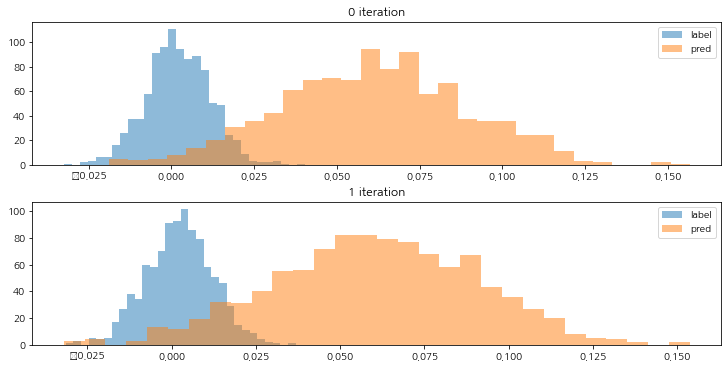

In [3]:
# knowledge 1
# subplot으로 두 개의 histgram을 겹쳐 그리기
fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10,5))
for i in range(2):
    label = np.random.normal(loc=0.002, scale=0.01, size=1000)
    pred = np.random.normal(loc=0.06, scale=0.03, size=1000)

    axes[i].hist(label, bins=30, alpha=0.5, label="label")
    axes[i].hist(pred, bins=30, alpha=0.5, label="pred")
    axes[i].set_title(f'{str(i)} iteration')
    axes[i].legend()
plt.show() 

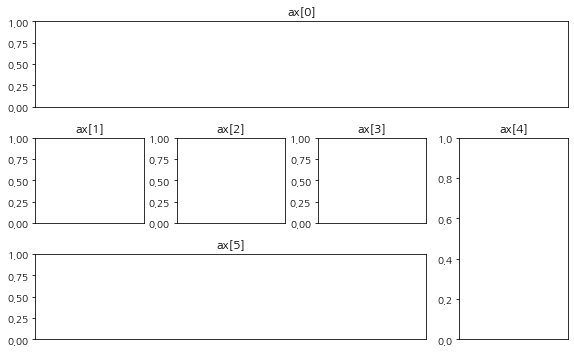

In [4]:
# knowledge 2
# plt.figure와 plt.subplot2grid를 사용해서 내가 원하는 형태로 그림 포멧을 만들어 그릴 수 있다.
fig = plt.figure(figsize=(8, 5)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1, rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title(f'ax[{ix}]') # ax의 title을 구분한다.
    ax[ix].set_xticks([]) # x ticks를 제거
    # ax[ix].set_yticks([]) # y ticks를 제거

fig.tight_layout()
plt.show()
# x, y ticks를 제거하면 그림이 다크 모드에서는 안보인다!!

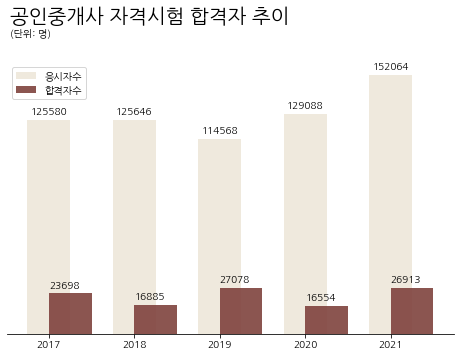

In [5]:
# knowledge 3

# 2개의 barplot을 그려 원하는 이미지를 생성한다. 고려사항은 다음과 같다.
# 1. 색상은 hex값을 얻어 color에 입력한다.
# 2. align을 edge로 설정하면 left edge를 x의 중심 좌표에 놓는다.
# 3. bar의 두께는 [x-width/2, x+width/2]로 조절된다. width를 조절하면 된다는 뜻.
# 4. 위, 오른쪽 축을 지우기(remove top and right axis)

data = pd.DataFrame(
    data={
        "응시자수":[125580, 125646, 114568, 129088, 152064],
        "합격자수":[23698, 16885, 27078, 16554, 26913]},
    index=[2017, 2018, 2019, 2020, 2021])

fig, ax = plt.subplots(figsize=(8, 5)) # initialize figure
ax.bar(x=data.index, height=data["응시자수"], width=0.5, color="#efe9dd", label="응시자수")
ax.bar(x=data.index, height=data["합격자수"], width=0.5, align='edge', color="#7f423d", alpha=0.9, label="합격자수")
for i in data.index:
    ax.annotate(str(data["응시자수"][i]), xy=(i, data["응시자수"][i]+3000), ha='center')
    ax.annotate(str(data["합격자수"][i]), xy=(i, data["합격자수"][i]+3000), ha='left')

ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_yticks([])

fig.text(0.13, 0.99, '공인중개사 자격시험 합격자 추이', fontsize=20, fontweight='bold')
fig.text(0.13, 0.95, '(단위: 명)', fontsize=10, fontweight='bold')
ax.legend()

# xaxis의 간격을 더 넓게 조절하는 방법을 알면 좋을 것 같다.
# legend position과 format을 바꾸면 좋을 것 같다.
# 가운데 색상 다르게 제목상자 만들어야 한다.